In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(style='whitegrid', palette='deep', font='sans-serif')

In [2]:
"""
ch10
    pag 172
    pag 175
    pag 176
ch 11
    pag 186
    pag 187
    pag 190
    pag 192
    pag 196
ch 12
    pag 203
    pag 207
    pag 209
ch 13
    pag 234
    pag 235
    pag 236
ch 14
    pag 238
    pag 247
    pag 250
    pag 256
ch 15
    pag 261
    pag 268
    pag 274
    pag 277
ch 16
    pag 280
    pag 281
    pag 282
    pag 285
    pag 292
ch 17
    pag 300
    pag 304
    pag 307
    pag 308
    pag 310
    pag 313
ch 18
    pag 317
    pag 321
ch 19
    pag 335
    pag 336
    pag 337
    pag 342
    pag 343
    pag 345
ch 21
    pag 381
"""

'\nch10\n    pag 172\n    pag 175\n    pag 176\nch 11\n    pag 186\n    pag 187\n    pag 190\n    pag 192\n    pag 196\nch 12\n    pag 203\n    pag 207\n    pag 209\nch 13\n    pag 234\n    pag 235\n    pag 236\nch 14\n    pag 238\n    pag 247\n    pag 250\n    pag 256\nch 15\n    pag 261\n    pag 268\n    pag 274\n    pag 277\nch 16\n    pag 280\n    pag 281\n    pag 282\n    pag 285\n    pag 292\nch 17\n    pag 300\n    pag 304\n    pag 307\n    pag 308\n    pag 310\n    pag 313\nch 18\n    pag 317\n    pag 321\nch 19\n    pag 335\n    pag 336\n    pag 337\n    pag 342\n    pag 343\n    pag 345\nch 21\n    pag 381\n'

# Chapter 10 - Descending the Right Curve

In [3]:
true_response_y = np.array([np.cos(i/10.) for i in range(20, 70)])
feature_x = np.arange(start=0, stop=1, step=1/len(true_response_y))

In [4]:
random.seed(17)
sampled_points = random.sample(range(len(true_response_y)), k=5)

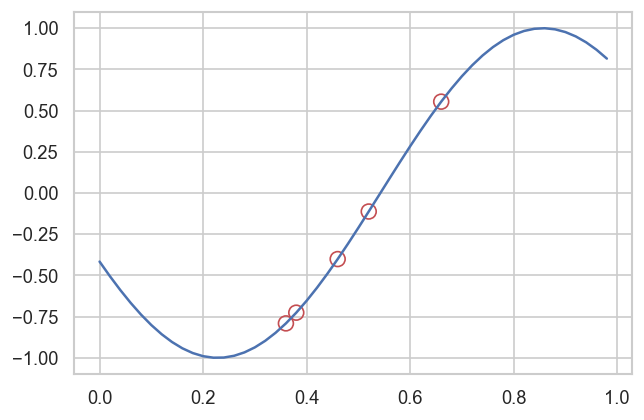

In [5]:
fig, ax = plt.subplots(dpi=120)
plt.plot(feature_x, true_response_y, label="True function") 
plt.scatter(feature_x[sampled_points], true_response_y[sampled_points], 
            s=80, facecolors='none', edgecolors='r')
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

mappings = list()
for p in range(1, 9):
    poly = PolynomialFeatures(p)
    X = poly.fit_transform(feature_x.reshape(-1, 1))

    lr.fit(X[sampled_points], true_response_y[sampled_points])
    mappings.append(lr.predict(X))

In [7]:
noisy_mappings = list()

random.seed(0)
noise = (np.random.random(len(feature_x)) - 0.5) * 0.2
noisy_y = true_response_y.reshape(-1, 1) + noise.reshape(-1, 1)
    
for p in [1, 2, 3, 5, 9, 15, 25]:
    poly = PolynomialFeatures(p)
    X = poly.fit_transform(feature_x.reshape(-1, 1))
    lr.fit(X[sampled_points], noisy_y[sampled_points])
    noisy_mappings.append(lr.predict(X))

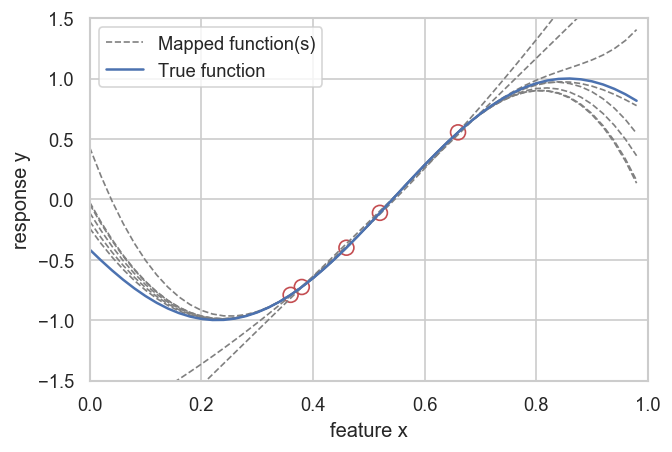

In [8]:
fig, ax = plt.subplots(dpi=120)

for m, mapping in enumerate(mappings):
    if m==0:
        plt.plot(feature_x, mapping,
                 color='gray',
                 linestyle="--",
                 linewidth=1,
                 label="Mapped function(s)")
    else:
        plt.plot(feature_x, mapping,
                 color='gray',
                 linewidth=1,
                 linestyle="--")

plt.plot(feature_x, true_response_y, label="True function") 
plt.scatter(feature_x[sampled_points], true_response_y[sampled_points], 
            s=80, facecolors='none', edgecolors='r')
plt.ylim((-1.5,1.5))
plt.xlim((0,1))
plt.xlabel("feature x")
plt.ylabel("response y")
plt.legend()
plt.show()

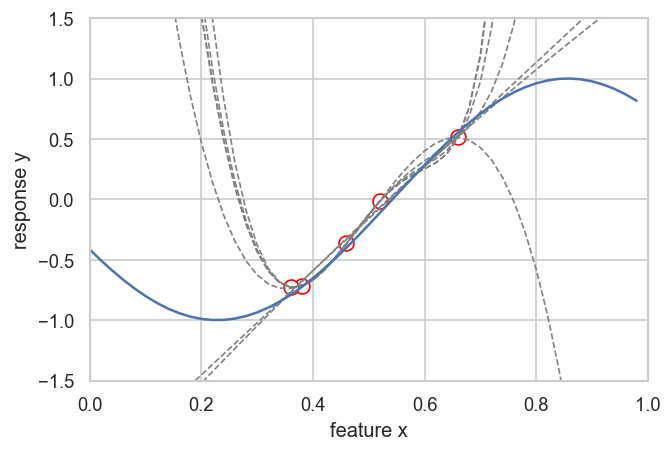

In [9]:
fig, ax = plt.subplots(dpi=120)

for m, mapping in enumerate(noisy_mappings):
    if m==0:
        plt.plot(feature_x, mapping,
                 color='gray',
                 linestyle="--",
                 linewidth=1,
                 label="Mapped function(s)")
    else:
        plt.plot(feature_x, mapping,
                 color='gray',
                 linewidth=1,
                 linestyle="--")

plt.plot(feature_x, true_response_y, 
         label="True function") 

plt.scatter(feature_x[sampled_points], noisy_y[sampled_points], 
            s=80, facecolors='white', edgecolors='red')
plt.ylim((-1.5,1.5))
plt.xlim((0,1))
plt.xlabel("feature x")
plt.ylabel("response y")
plt.show()

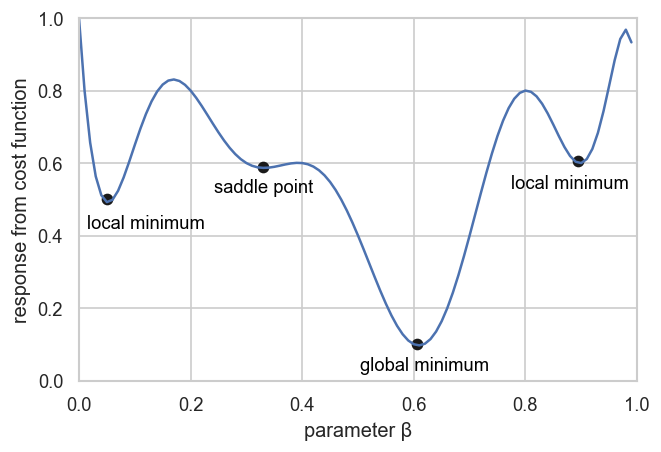

In [10]:
x = np.array([0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
y = np.array([1.0, 0.65, 0.80, 0.60, 0.60, 0.40, 0.10, 0.40, 0.80, 0.60, 0.80])

poly = PolynomialFeatures(10)
X = poly.fit_transform(x.reshape(-1, 1))
lr.fit(X, y)
smoothed_x = np.arange(start=0.0, stop=1.0, step=0.01)
smoothed_y = lr.predict(poly.transform(smoothed_x.reshape(-1, 1)))

fig, ax = plt.subplots(dpi=120)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.xlabel("parameter β")
plt.ylabel("response from cost function")
plt.plot([0.05, 0.33, 0.605, 0.895], [0.5, 0.59, 0.10, 0.605], 'ko')
ax.text(0.12, 0.42, s='local minimum', color='black', size=11, horizontalalignment='center')
ax.text(0.33, 0.52, s='saddle point', color='black', size=11, horizontalalignment='center')
ax.text(0.62, 0.03, s='global minimum', color='black', size=11, horizontalalignment='center')
ax.text(0.88, 0.53, s='local minimum', color='black', size=11, horizontalalignment='center')
ax.plot(smoothed_x, smoothed_y)
plt.show()

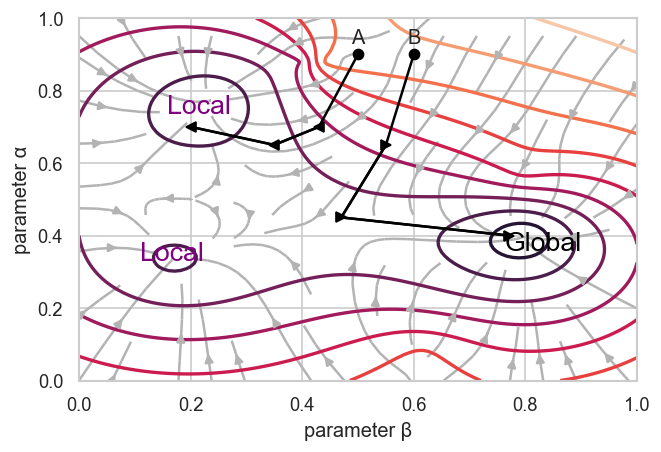

In [11]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

# Inspired by:
# https://stackoverflow.com/questions/16529892/adding-water-flow-arrows-to-matplotlib-contour-plot

np.random.seed(1988)

x, y, z = np.random.random((3, 10))
x[0], y[0], z[0] = 0.8, 0.4, 0.1
x[1], y[1], z[1] = 0.2, 0.5, 0.4
global_min = np.argsort(z)[0]
local_min_1 = np.argsort(z)[1]
local_min_2 = np.argsort(z)[2]

xi, yi = np.mgrid[0:1:100j, 0:1:100j]
func = Rbf(x, y, z, function='linear')
zi = func(xi, yi)

fig, ax = plt.subplots(dpi=120)
dy, dx = np.gradient(-zi.T) # Optimization goes down gradient (thus -zi)
ax.streamplot(xi[:,0], yi[0,:], dx, dy, color='0.7', density=0.6)
contours = ax.contour(xi, yi, zi, levels=10, linewidths=2)

ax.text(x[global_min]*1.04, y[global_min]*0.9, s='Global', color='black', size=16, 
        horizontalalignment='center')
ax.text(x[local_min_1]*0.90, y[local_min_1]*0.95, s='Local', color='purple', size=16, 
        horizontalalignment='center')
ax.text(x[local_min_2], y[local_min_2], s='Local', color='purple', size=16, 
        horizontalalignment='center')

ax.plot([0.6, 0.55, 0.47, 0.77],[0.9, 0.65, 0.45, 0.4], c='black')
ax.plot([0.55, 0.47, 0.77],[0.65, 0.45, 0.4], c='black', marker='>')
ax.plot([0.6],[0.9], c='black', marker='o')
ax.text(0.6, 0.93, s='B', horizontalalignment='center', size=12)
ax.plot([0.5, 0.43, 0.35, 0.2],[0.9, 0.7, 0.65, 0.7], c='black')
ax.plot([0.43, 0.35, 0.2],[0.7, 0.65, 0.7], c='black', marker='<')
ax.plot([0.5],[0.9], c='black', marker='o')
ax.text(0.5, 0.93, s='A', horizontalalignment='center', size=12)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.xlabel("parameter β")
plt.ylabel("parameter α")

plt.show()

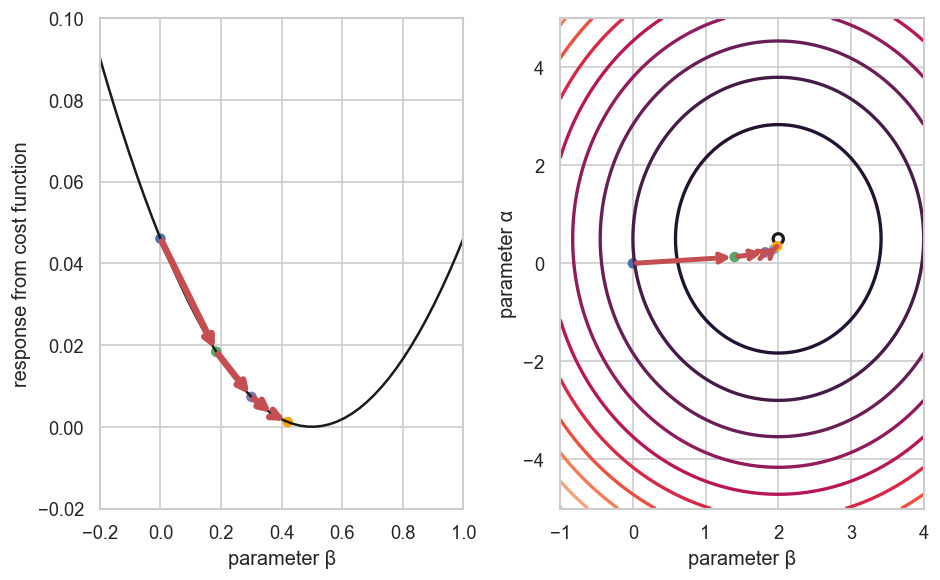

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5), dpi=120)
ax[0].plot(theta1_grid, J_grid, 'k')
ax[0].scatter(theta1, J, c=colors, s=40, lw=0)
ax[0].set_xlim(-0.2, 1)
ax[0].set_ylim(-0.02, 0.1)
for j in range(1,N):
    ax[0].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 4},
                   va='center', ha='center')
ax[0].set_xlabel(r'parameter β')
ax[0].set_ylabel('response from cost function')

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, levels=10, linewidths=2)
#ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']

for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 3},
                   va='center', ha='center')
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'parameter β')
ax[1].set_ylabel(r'parameter α')

plt.tight_layout()
plt.show()

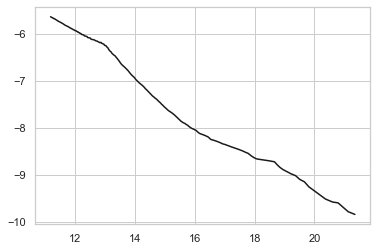

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                          flip_y=0.00, class_sep=1.0, shuffle=True, random_state=42)

fig, ax = plt.subplots()
sequence = np.arange(len(X))

np.random.seed(45)
np.random.shuffle(sequence)
cls = SGDClassifier(warm_start=True, random_state=42)

path = list()
for step in range(1000):
    cls.partial_fit(X[sequence], np.ravel(y[sequence]), classes=[0,1])
    path.append(list(cls.coef_[0]))

path = pd.DataFrame(path, columns=['x', 'y'])

plt.plot(path.x.rolling(100).mean()[99:], path.y.rolling(100).mean()[99:], 'k')

# Validating Machine Learning

In [14]:
true_response_y = np.array([np.cos(i/10.) for i in range(30, 75)])
feature_x = np.arange(start=0, stop=1, step=1/len(true_response_y))

In [15]:
def add_noise(m=0.3):
    return (int(np.random.random() > 0.5) * 2 - 1) * np.random.random() * m

In [16]:
np.random.seed(42)
noisy_measurement = [i+add_noise(m=0.7) for i in true_response_y]

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

lr = LinearRegression()
svm = KNeighborsRegressor(n_neighbors=10)
knn = KNeighborsRegressor(n_neighbors=2)

lr_model = lr.fit(feature_x.reshape(-1, 1), noisy_measurement).predict(feature_x.reshape(-1, 1))
svm_model = svm.fit(feature_x.reshape(-1, 1), noisy_measurement).predict(feature_x.reshape(-1, 1))
knn_model = knn.fit(feature_x.reshape(-1, 1), noisy_measurement).predict(feature_x.reshape(-1, 1))

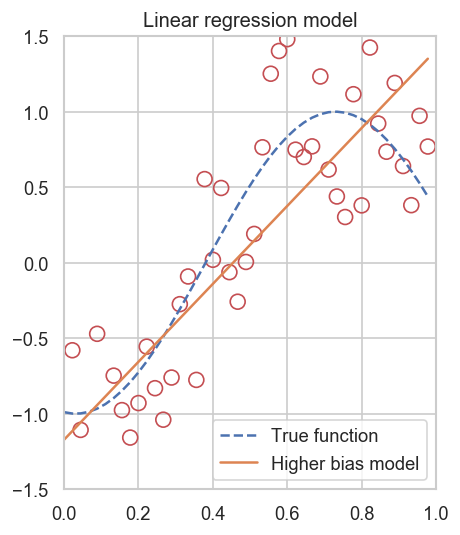

In [17]:
fig, ax = plt.subplots(figsize=(4, 5), dpi=120)
plt.plot(feature_x, true_response_y, label="True function", linestyle='dashed')
plt.plot(feature_x, lr_model, label="Higher bias model") 
plt.scatter(feature_x, noisy_measurement, 
            s=80, facecolors='none', edgecolors='r')
ax.set_xlim(0, 1)
ax.set_ylim(-1.5, 1.5)
ax.set_title('Linear regression model')
plt.legend(loc='lower right')
plt.show()

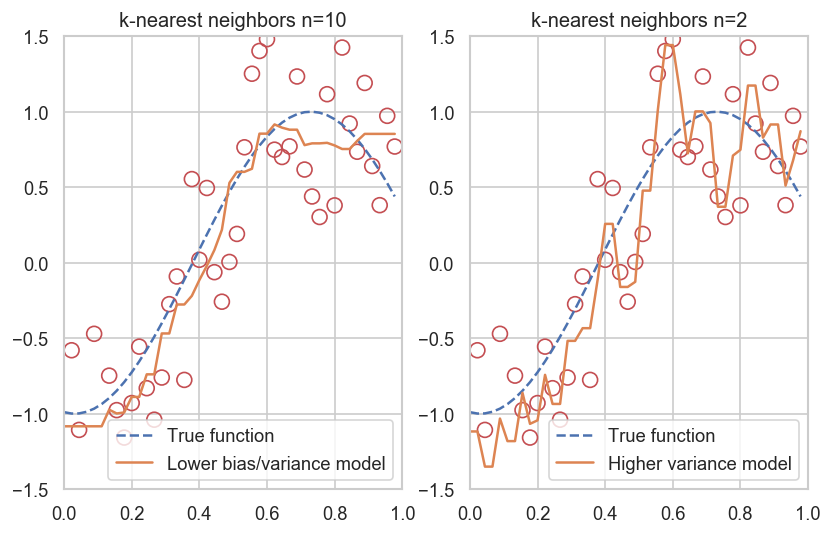

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), dpi=120)
ax = axs[0]
ax.plot(feature_x, true_response_y, label="True function", linestyle='dashed')
ax.plot(feature_x, svm_model, label="Lower bias/variance model") 
ax.scatter(feature_x, noisy_measurement, 
            s=80, facecolors='none', edgecolors='r')
ax.set_xlim(0, 1)
ax.set_ylim(-1.5, 1.5)
ax.set_title('k-nearest neighbors n=10')
ax.legend(loc='lower right')

ax = axs[1]
ax.plot(feature_x, true_response_y, label="True function", linestyle='dashed')
ax.plot(feature_x, knn_model, label="Higher variance model") 
ax.scatter(feature_x, noisy_measurement, 
            s=80, facecolors='none', edgecolors='r')
ax.set_xlim(0, 1)
ax.set_ylim(-1.5, 1.5)
ax.set_title('k-nearest neighbors n=2')
ax.legend(loc='lower right')

plt.show()

# Chapter 12 - Starting with simple learners

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def xor_func(a, b):
    return int((a and not b) or (not a and b))

def or_func(a, b):
    return int(a or b)

def colorize(c):
    return ['blue' if i==1 else 'red' for i in c]

def plot_decision_function(clf, ax, margins=True):
    # create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    if margins:
        ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.9,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(XX, YY, Z, colors=['black'], levels=[0], alpha=0.9,
                   linestyles=['-'])

    try:
        # plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200,
                   linewidth=1, facecolors='none', edgecolors='red')
    except:
        pass

def create_panel(nrows=1, ncols=1, inches = (7, 5), dpi=90):
    fig, axs = plt.subplots(nrows, ncols, figsize=inches, dpi=dpi)
    if (nrows * ncols)==1:
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    return fig, axs

In [21]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])
or_problem = np.array([or_func(a, b) for a,b in x])
xor_problem = np.array([xor_func(a, b) for a,b in x])

[1 1 1 0] [1 1 1 0]
[0 1 1 0] [1 1 1 0]


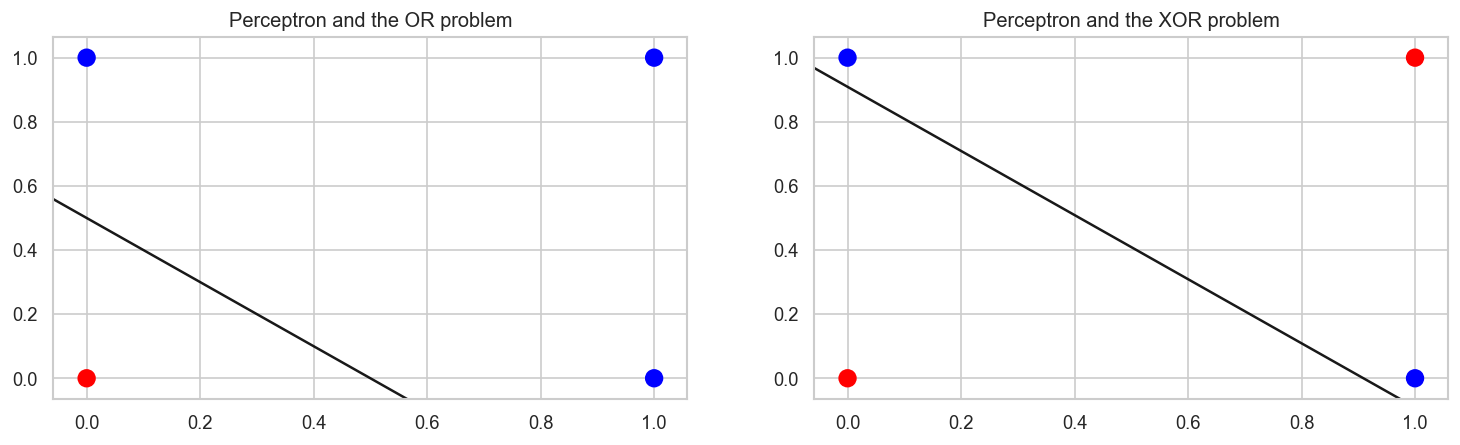

In [22]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=10, shuffle=False, warm_start=True, fit_intercept=True)

# Plot the panel
fig, axs = create_panel(ncols=2, inches=(15, 4), dpi=120)

ax = axs[0]
perceptron.fit(x, or_problem)
ax.scatter(x[:,0], x[:,1], s=100.0, c=colorize(or_problem))
plot_decision_function(perceptron, ax, margins=False)
ax.set_title("Perceptron and the OR problem")
print(or_problem, perceptron.predict(x))

ax = axs[1]
perceptron.coef_= [1.1, 1.1]
perceptron.fit(x, xor_problem)
ax.scatter(x[:,0], x[:,1], s=100.0, c=colorize(xor_problem))
plot_decision_function(perceptron, ax, margins=False)
ax.set_title("Perceptron and the XOR problem")
print(xor_problem, perceptron.predict(x))

plt.show()

## CH Leveraging Similarity

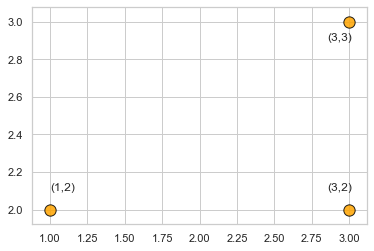

In [34]:
D = np.array([(1,2), (3,2), (3,3)])
plt.scatter(D[:,0], D[:,1], s=2**7, c='orange',
    edgecolors='black', alpha=0.85, cmap='winter')
plt.annotate("(1,2)", (1,2+0.1))
plt.annotate("(3,2)", (3-0.15,2+0.1))
plt.annotate("(3,3)", (3-0.15,3-0.1))
plt.show()

## CH 14 Hitting Complexity with Neural Networks

In [24]:
def create_panel(nrows=1, ncols=1, inches = (7, 5), dpi=90):
    fig, axs = plt.subplots(nrows, ncols, figsize=inches, dpi=dpi)
    if (nrows * ncols)==1:
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    return fig, axs

In [25]:
def step(x):
    return 0 if x < 0 else 1

def logistic(x):
    return 1/(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return 0 if x < 0.0 else x

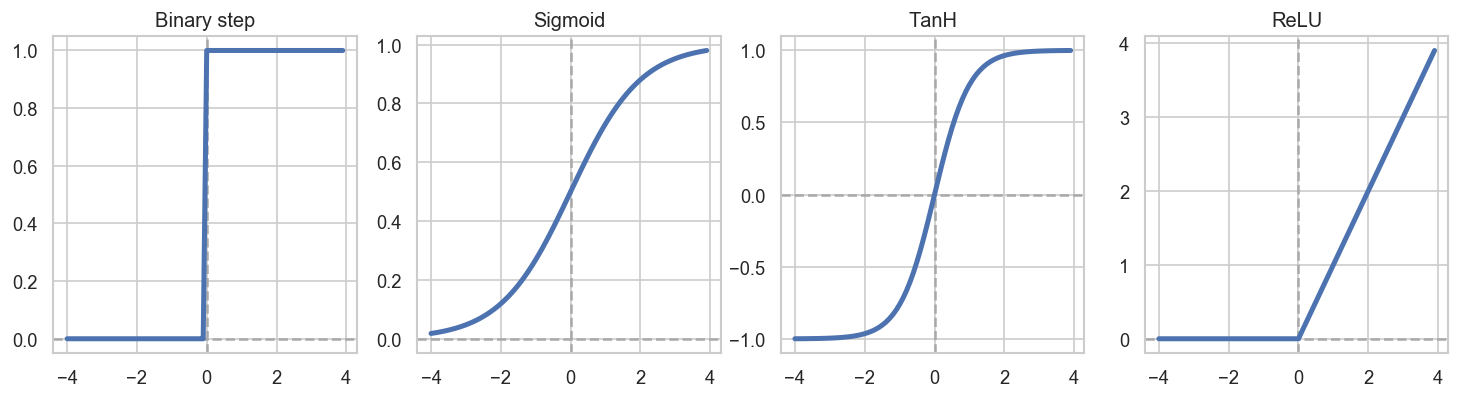

In [26]:
# Plot the panel
fig, axs = create_panel(ncols=4, inches=(15, 3.5), dpi=120)
abscissa = np.arange(-4, 4, 0.1)

ax = axs[0]
vals = list()
for val in abscissa:
    vals.append(step(val))
ax.axvline(x=0.0, linestyle='--', color='darkgray')
ax.axhline(y=0.0, linestyle='--', color='darkgray')    
ax.plot(abscissa, vals, linewidth=3.0)
ax.set_title("Binary step")

ax = axs[1]
vals = list()
for val in abscissa:
    vals.append(logistic(val))
ax.axvline(x=0.0, linestyle='--', color='darkgray')
ax.axhline(y=0.0, linestyle='--', color='darkgray')    
ax.plot(abscissa, vals, linewidth=3.0)
ax.set_title("Sigmoid")

ax = axs[2]
vals = list()
for val in abscissa:
    vals.append(tanh(val))
ax.axvline(x=0.0, linestyle='--', color='darkgray')
ax.axhline(y=0.0, linestyle='--', color='darkgray')    
ax.plot(abscissa, vals, linewidth=3.0)
ax.set_title("TanH")

ax = axs[3]
vals = list()
for val in abscissa:
    vals.append(relu(val))
ax.axvline(x=0.0, linestyle='--', color='darkgray')
ax.axhline(y=0.0, linestyle='--', color='darkgray')
ax.plot(abscissa, vals, linewidth=3.0)
ax.set_title("ReLU")

plt.show()

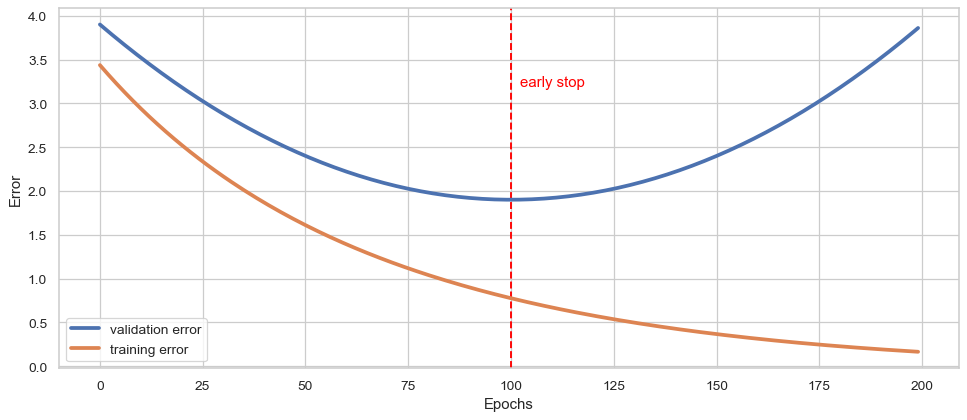

In [27]:
fig, ax = create_panel(ncols=1, inches=(10, 4), dpi=90)
epochs = 500

iterations = list(range(epochs))
training = list()
testing = list()

def train_response(i, vert):
    return (np.exp((1-i/vert)**5)-1)*2

def test_response(i, p, q, r):
    return (p*i**2 + q*i + r) - 0.3


for i in iterations:
    training.append(train_response(i, epochs))
    testing.append(test_response(i, 0.0002, -0.04, 4.2))

ax.axvline(x=100, linestyle='--', color='red')
ax.plot(iterations[:200], testing[:200], linewidth=3.0, label='validation error')
ax.plot(iterations[:200], training[:200], linewidth=3.0, label='training error')
ax.set_xlabel(r'Epochs')
ax.set_ylabel(r'Error')
ax.text(110, 3.2, s='early stop', color='red', size=12, horizontalalignment='center')
ax.legend(loc='lower left')
plt.show()

# Chapter 17 - Going a step beyond using SVM

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.datasets import make_blobs, make_circles

In [29]:
def generate_example(n_samples=25, centers=2, cluster_std=1, random_state=0):
    return make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

def plot_decision_function(clf, ax, margins=True):
    # create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    if margins:
        ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.9,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(XX, YY, Z, colors=['black'], levels=[0], alpha=0.9,
                   linestyles=['-'])

    try:
        # plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200,
                   linewidth=1, facecolors='none', edgecolors='red')
    except:
        pass

def create_panel(nrows=1, ncols=1, inches = (7, 5), dpi=120):
    fig, axs = plt.subplots(nrows, ncols, figsize=inches, dpi=dpi)
    if (nrows * ncols)==1:
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    return fig, axs
    
def plot_points(X, ax, no_ticks=True):
        ax.scatter(X[:, 0], X[:, 1], 
                    c=['white' if e == 0 else 'blue' for e in y], 
                    s=80, 
                    cmap=plt.cm.Paired, 
                    facecolors='none', edgecolors='blue')

        if no_ticks:
            ax.set_xticks([])
            ax.set_yticks([])

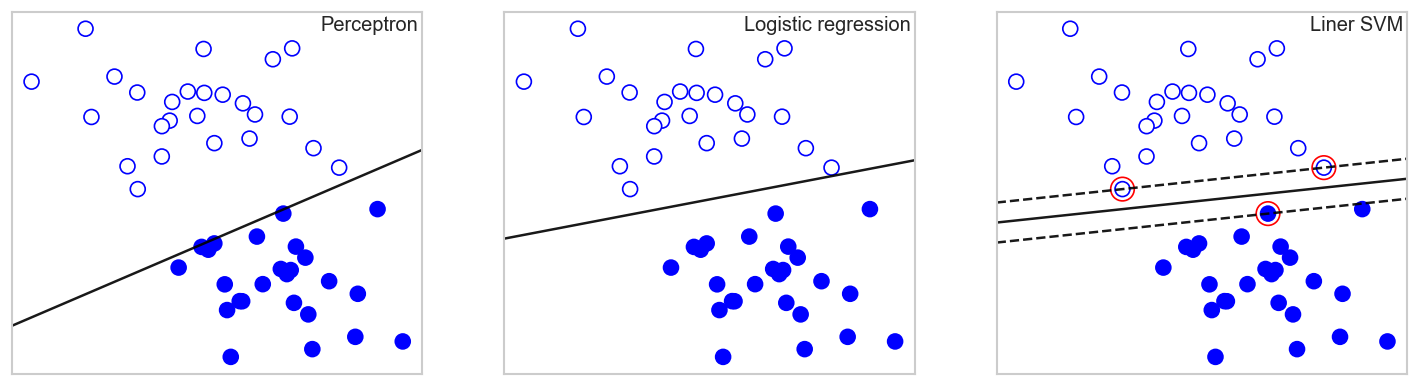

In [30]:
# Create the data
X, y = generate_example(n_samples=50, centers=2, cluster_std=0.78, random_state=0)

# Plot the panel
fig, axs = create_panel(ncols=3, inches=(15, 4), dpi=120)

# Perceptron
clf = Perceptron(max_iter=10**6, random_state=100, validation_fraction=0.01)
clf.fit(X, y)

ax = axs[0]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=False)
ax.text(0.99, 0.99,'Perceptron',
     horizontalalignment='right',
     verticalalignment='top',
     transform = ax.transAxes)

# Logistic regression
clf = LogisticRegression(C=0.01, solver='lbfgs')
clf.fit(X, y)

ax = axs[1]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=False)
ax.text(0.99, 0.99,'Logistic regression',
     horizontalalignment='right',
     verticalalignment='top',
     transform = ax.transAxes)

# Support vector machine
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

ax = axs[2]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=True)
ax.text(0.99, 0.99,'Liner SVM',
     horizontalalignment='right',
     verticalalignment='top',
     transform = ax.transAxes)

# show the plot
plt.show()

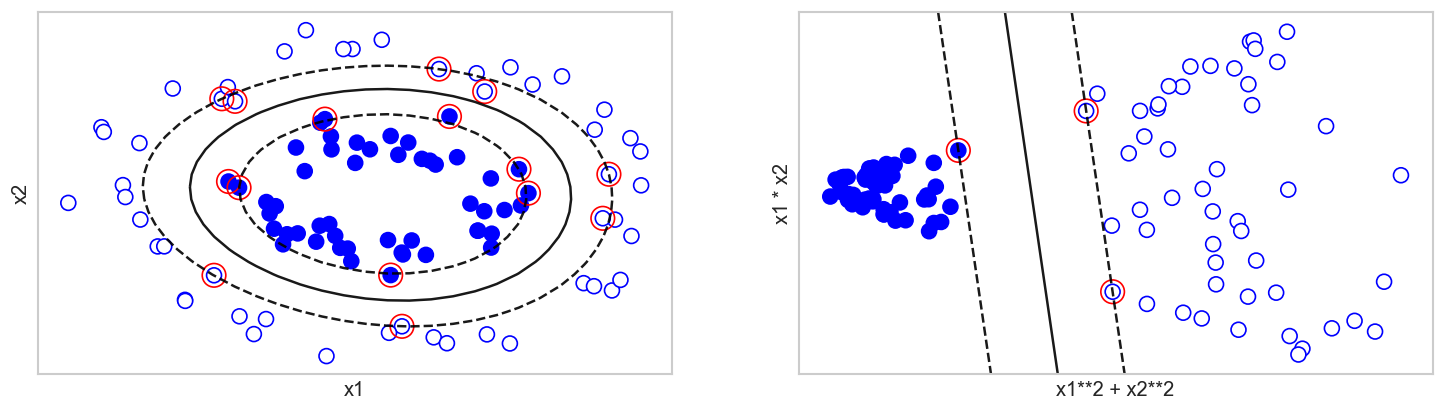

In [31]:
X, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=8, factor=0.4)

# Plot the panel
fig, axs = create_panel(ncols=2, inches=(15, 4), dpi=120)

# Plot the points
clf = svm.SVC(kernel='rbf', gamma='auto', C=7.0)
clf.fit(X, y)
ax = axs[0]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=True)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)

# Plot the transformed points
Xt = np.vstack(((X[:,0]**2 + X[:,1]**2), X[:,0] * X[:,1])).T
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(Xt, y)

ax = axs[1]
plot_points(Xt, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=True)
ax.set_xlabel('x1**2 + x2**2', fontsize=12)
ax.set_ylabel('x1 * x2', fontsize=12)

# show the plot
plt.show()

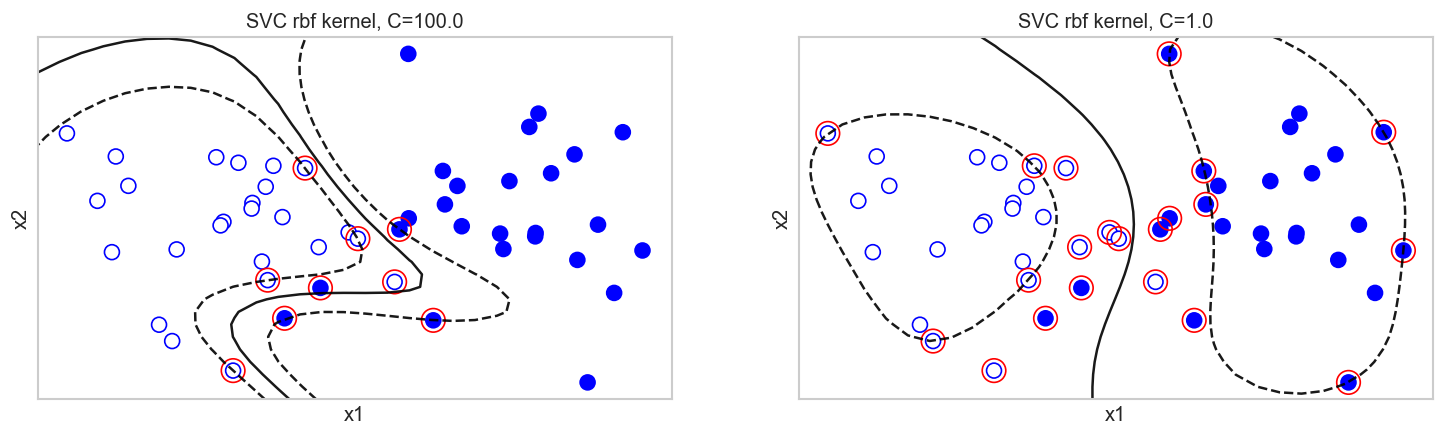

In [32]:
a = np.random.randint(5000)
X, y = generate_example(n_samples=50, centers=2, cluster_std=1.5, random_state=454)

# Plot the panel
fig, axs = create_panel(ncols=2, inches=(15, 4), dpi=120)

# Plot the points
clf = svm.SVC(kernel='rbf', gamma='scale', C=100.0)
clf.fit(X, y)
ax = axs[0]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=True)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_title('SVC rbf kernel, C=100.0')

# Plot the transformed points
clf = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
clf.fit(X, y)
ax = axs[1]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=True)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_title('SVC rbf kernel, C=1.0')

# show the plot
plt.show()
# 2016, 136 3472

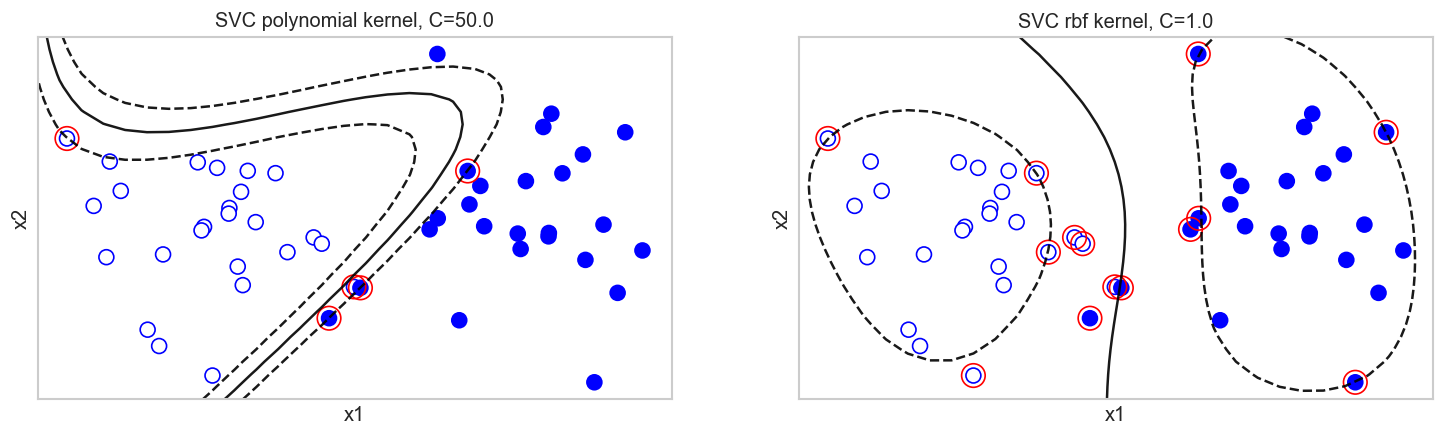

In [33]:
X, y = generate_example(n_samples=50, centers=2, cluster_std=1.2, random_state=454)

# Plot the panel
fig, axs = create_panel(ncols=2, inches=(15, 4), dpi=120)

# Plot the points
clf = svm.SVC(kernel='poly', gamma='scale', degree=3, C=50.0)
clf.fit(X, y)
ax = axs[0]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=True)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_title('SVC polynomial kernel, C=50.0')

# Plot the transformed points
clf = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
clf.fit(X, y)
ax = axs[1]
plot_points(X, ax, no_ticks=True)
plot_decision_function(clf, ax, margins=True)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_title('SVC rbf kernel, C=1.0')

# show the plot
plt.show()

# Chapter 18 - Resorting to Ensembles of Learners

C:\Users\Luca\anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: No contour levels were found within the data range.
C:\Users\Luca\anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: No contour levels were found within the data range.


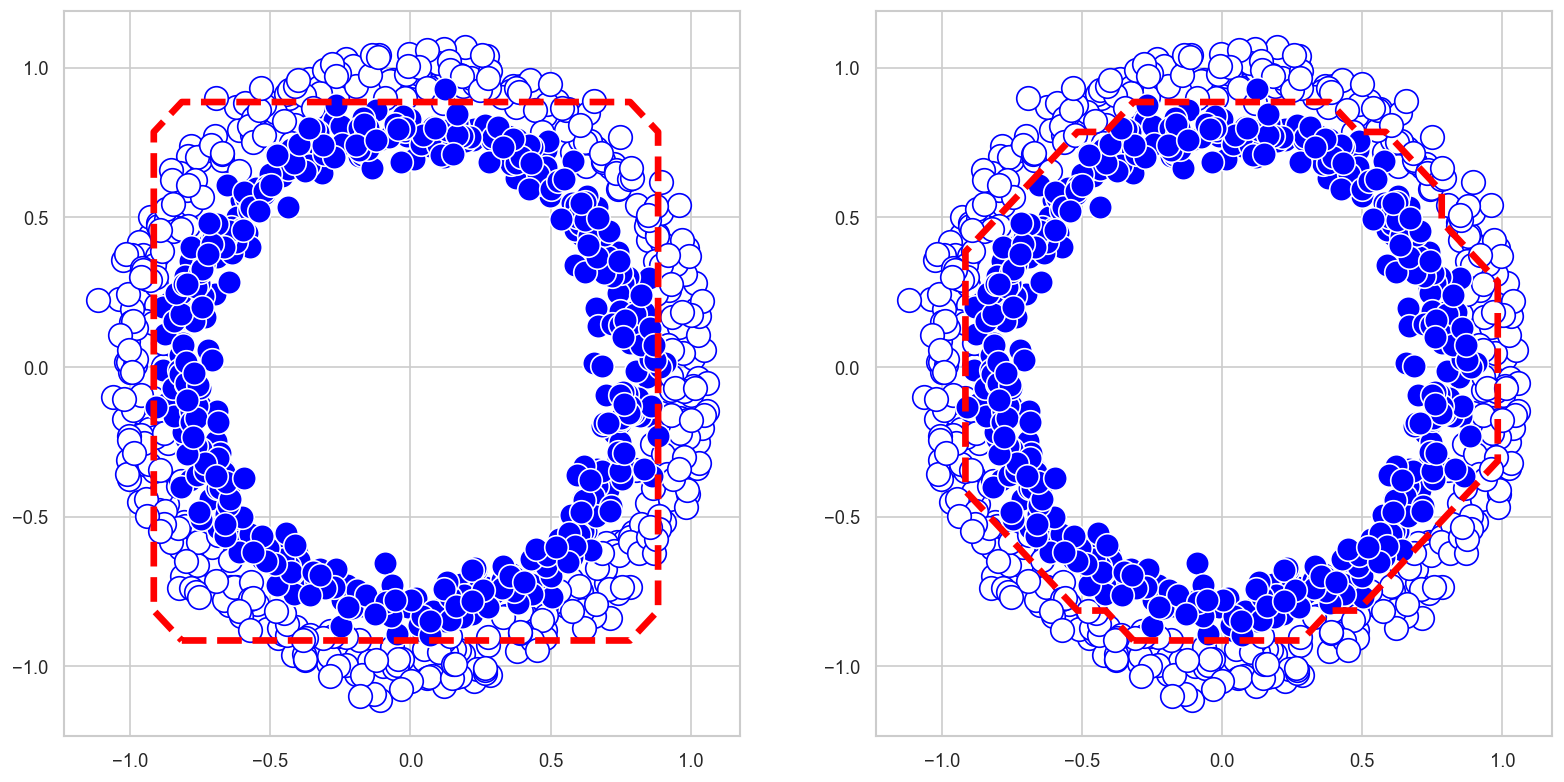

In [23]:
def create_panel(nrows=1, ncols=1, inches = (7, 5), dpi=90):
    fig, axs = plt.subplots(nrows, ncols, figsize=inches, dpi=dpi)
    if (nrows * ncols)==1:
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    return fig, axs

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.8, noise=.05, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X, y)

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
bag = AdaBoostClassifier(n_estimators=1000)
bag.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min(), X[:, 0].max() 
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, axs = create_panel(ncols=2, inches=(16, 8), dpi=120)

ax = axs[0]
ax.scatter(X[y==0][:, 0], X[y==0][:, 1], s=200, 
           linewidth=1, facecolors='white', edgecolors='blue')
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], s=200, 
           linewidth=1, facecolors='blue', edgecolors='white')

Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, alpha=1.0, linestyles='--', 
           linewidths=4.0, colors='red', levels=0)

ax = axs[1]
ax.scatter(X[y==0][:, 0], X[y==0][:, 1], s=200, 
           linewidth=1, facecolors='white', edgecolors='blue')
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], s=200, 
           linewidth=1, facecolors='blue', edgecolors='white')

Z = bag.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, alpha=1.0, linestyles='--', 
           linewidths=4.0, colors='red', levels=0)

plt.show()